# Lesson 9 Assignment: DNN
## Author: Dustin Burnham
## Due: 9/8/2019

You start working for a new startup building the next generation search engine. The search engine provides the ability to search images with their content. You are tasked to build a machine learning model that is able to identify the objects in images. The model you are building will help in providing the capability to search for 10 objects.

Using the CIFAR-10 dataset, create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

1. Read CIFAR-10 dataset from Keras.
2. Explore data
3. Preprocess and prepare data for classification
4. Build a TensorFlow model using a single dense hidden layer
5. Apply model to test set and evaluate accuracy
6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy
7. Summarize your findings regarding the different iterations and any insights gained

In [1]:
# Read in library
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import seaborn as sns
%matplotlib inline

### 1. Read in data

In [2]:
# Read in data
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. EDA

In [3]:
# Check out targets
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
# Check out features
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0, 0:10, 0:10, 0]

array([[ 59,  43,  50,  68,  98, 119, 139, 145, 149, 149],
       [ 16,   0,  18,  51,  88, 120, 128, 127, 126, 116],
       [ 25,  16,  49,  83, 110, 129, 130, 121, 113, 112],
       [ 33,  38,  87, 106, 115, 117, 114, 105, 107, 121],
       [ 50,  59, 102, 127, 124, 121, 120, 114, 107, 125],
       [ 71,  84, 110, 129, 136, 131, 129, 119, 108, 122],
       [ 97, 111, 123, 130, 136, 132, 122, 121, 127, 138],
       [115, 119, 130, 140, 133, 127, 138, 137, 131, 133],
       [137, 128, 132, 128, 119, 123, 128, 130, 121, 137],
       [154, 154, 156, 140, 123, 125, 126, 127, 133, 132]], dtype=uint8)

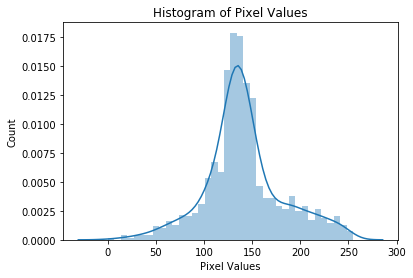

In [7]:
# Check out values of pixels
sns.distplot(x_train[0,:,:,0].flatten())
plt.xlabel("Pixel Values")
plt.ylabel("Count")
plt.title("Histogram of Pixel Values")
plt.show()

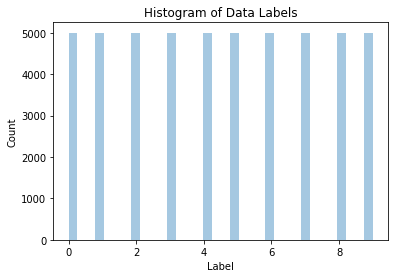

In [8]:
# Check out distribution of labels
sns.distplot(y_train, kde=False)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Histogram of Data Labels")
plt.show()

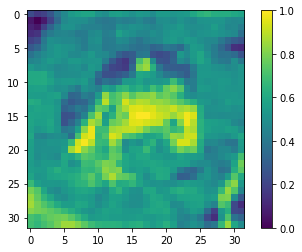

In [9]:
# Check out image
plt.figure()
plt.imshow(x_train[0,:,:,0]/255)
plt.colorbar()
plt.grid(False)
plt.show()

### 3. Preprocessing

In [10]:
# Normalize Data
x_train, x_test = x_train / 255.0, x_test / 255.0

### 4. Build a TensorFlow model using a single dense hidden layer

In [11]:
# Create model
model = keras.Sequential([
    #keras.layers.Conv2D(32, (2, 2), input_shape = (32, 32, 3)),
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(200, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [12]:
# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Fit model
model.fit(x_train, y_train, epochs = 10)

W0908 15:29:24.786321 4644640192 deprecation.py:323] From /Users/dusty/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 77us/sample - loss: 1.8886 - accuracy: 0.3164
Epoch 2/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.7472 - accuracy: 0.3697
Epoch 3/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.6932 - accuracy: 0.3941
Epoch 4/10
50000/50000 [==============================] - 4s 75us/sample - loss: 1.6627 - accuracy: 0.4067
Epoch 5/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.6360 - accuracy: 0.4183
Epoch 6/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.6197 - accuracy: 0.4247
Epoch 7/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.6019 - accuracy: 0.4313
Epoch 8/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.5906 - accuracy: 0.4365
Epoch 9/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.5851 - accuracy: 0.4355
Epoch 10/10
50

### 5. Apply model to test set and evaluate accuracy

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 1.6137 - accuracy: 0.4214
Test accuracy: 0.4214


In [16]:
train_loss, train_acc = model.evaluate(x_train, y_train)

print('Test accuracy:', train_acc)

50000/50000 [==============================] - 2s 37us/sample - loss: 1.5638 - accuracy: 0.4405
Test accuracy: 0.44048


#### Summary:
A DNN model with a single dense hidden layer does a poor job of accurately predicting the image labels with a test accuracy of 41%.  At least the model isn't very overfit.

### 6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy

In [17]:
# Create new model
# Changes:
# 1. Number of layers
# 2. CNN Layers
# 3. Max Pooling
# 4. Activation Functions relu -> tanh

model = keras.Sequential([
    keras.layers.Conv2D(32, (2, 2), input_shape = (32, 32, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3, seed = 42),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [18]:
# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4128      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [20]:
# Fit model
model.fit(x_train, y_train, epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.4320 - accuracy: 0.4831
Epoch 2/5
50000/50000 [==============================] - 49s 980us/sample - loss: 1.0600 - accuracy: 0.6245
Epoch 3/5
50000/50000 [==============================] - 50s 993us/sample - loss: 0.9079 - accuracy: 0.6790
Epoch 4/5
50000/50000 [==============================] - 49s 988us/sample - loss: 0.8106 - accuracy: 0.7139
Epoch 5/5
50000/50000 [==============================] - 50s 994us/sample - loss: 0.7284 - accuracy: 0.7407


In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 159us/sample - loss: 0.7718 - accuracy: 0.7281
Test accuracy: 0.7281


In [22]:
train_loss, train_acc = model.evaluate(x_train, y_train)

print('Test accuracy:', train_acc)

50000/50000 [==============================] - 7s 144us/sample - loss: 0.5676 - accuracy: 0.8037
Test accuracy: 0.80372


### 7. Summarize your findings regarding the different iterations and any insights gained

In [23]:
# Get predictions
predictions = model.predict(x_test)

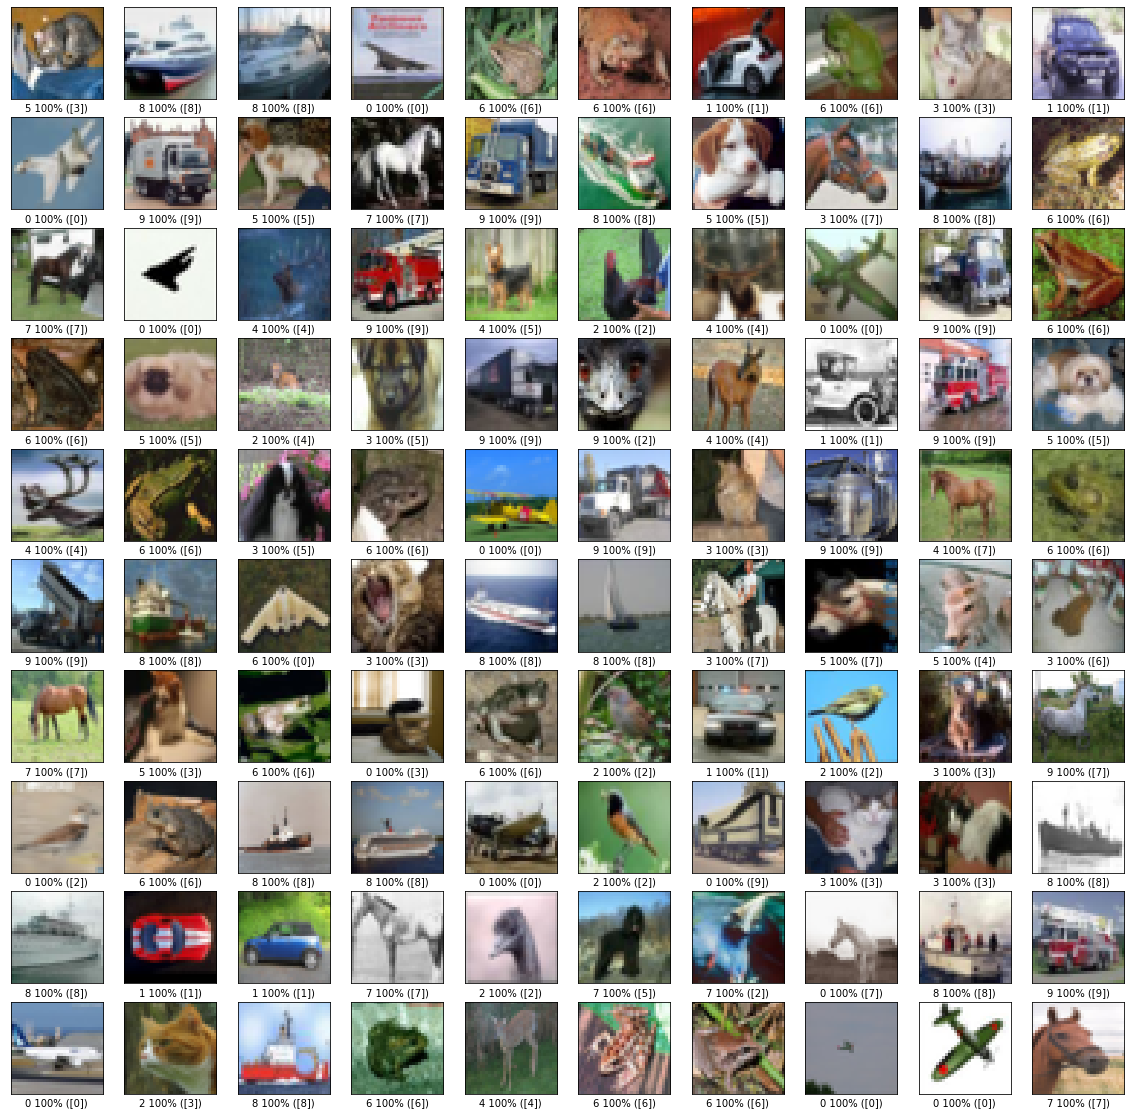

In [24]:
# Plot images and predictions
plt.figure(figsize=(20, 20))
for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), y_test[i]))
plt.show()

#### Findings:

Using a neural net with just a single dense layer will accurately predict the image around 40% of the time.  To improve this I used a series of CNN filters and max pooling, followed by flattening the data and using a dense layer.  This pushed the accuracy up to around 72%.  I varied the number of layers, the number of nodes, filter size, activation function and I think I landed on a good balance.  There is are still some inaccuracies as can be seen in the image and prediction plot, but for the most part not bad.  There is some overfitting, as the model does about 7% better on the training than on the test.

Final Model Structure:
1. 4 Filter layers
2. 2 Max pooling layers
3. 1 Dense layer with 200 nodes and 30% dropout to prevent overfitting
4. tanh activation functions

#### Many Insights:

The first step I tried was just to implement filter layers 1 at a time to drive up the accuracy.  I noticed an immediate increase in accuracy just after the first epoch.  Next, I added pooling layers.  What I found interesting was the more pooling layers I had, the smaller the cap my model would have.  For example having one pooling layer per filter layer capped the models accuracy around 50%.  In addition, I noticed the number of filter layers eventually stopped increasing the accuracy.  Next, I investigated the activation functions.  Sigmoid and softmax both decreased the accuracy, while relu and tanh produced similar results.  relu produced the best results, so I went with that over tanh.  Finally I flattened my data and passed it to a single dense layer with 200 nodes.  I tried a number of different node values, but the accuracy wasn't noticibly improved with a larger number (like 500), but the amount of overfitting definitely increased.  In addition, I added dropout 30% to this layer to reduce overfitting.  This really is a "tinker" science, needing lots of trial and error.